In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from climatico import enso
from climatico.util import weighted_mean
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
from config import directory_figs, directory_data

In [3]:
# list of filenames to do this for
file_g02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG02Sv.pop.h.SST.*.nc'
file_g04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG04Sv.pop.h.SST.*.nc'
file_p02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP02Sv.pop.h.SST.*.nc'
file_p04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP04Sv.pop.h.SST.*.nc'
file_psalt = 'b1d.e11.B1850LENS.f09_g16.FWPaSalP04Sv.pop.h.SST.*.nc'
file_cntrl = 'b1d.e11.B1850C5CN.f09_g16.005.pop.h.SST.*.nc'

In [4]:
nino = enso.DefineNino(nino='nino34', lats='lat', lons='lon', cutoff=0.5, runningmean=3)

In [5]:
# extract first 100 years from control run for concatenating
ds = xr.open_mfdataset(f'{directory_data}{file_cntrl}',
                       combine='by_coords',
                       preprocess=nino.nino)
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
first100_ssts = weighted_mean(ds['SST'], lat_name='lat')
# rolling climo
first100_ssts_roll = nino.monthly_climo(first100_ssts, yrsroll=30, centered=True, time='time')

In [6]:
# extract first 100 years from control run for concatenating
ds = xr.open_mfdataset(f'{directory_data}{file_cntrl}',
                       combine='by_coords',
                       preprocess=nino.nino)
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
control_ssts = weighted_mean(ds['SST'], lat_name='lat')
# rolling climo
control_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                          control_ssts.sel(time=slice('0800-02-01 00:00:00', '1599-12-31 00:00:00'))], dim='time')
control_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")
control_ssts_roll = nino.monthly_climo(control_ssts.chunk({'time':900}), yrsroll=30, centered=True, time='time')
# grab numpy arrays
control_ssts_vals = control_ssts.values
control_ssts_roll_vals = control_ssts_roll.values

In [7]:
# g02sv
ds = xr.open_mfdataset(f'{directory_data}{file_g02sv}',
                       combine='by_coords',
                       preprocess=nino.nino)
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
g02sv_ssts = weighted_mean(ds['SST'], lat_name='lat')
# rolling climo
g02sv_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                        g02sv_ssts.sel(time=slice('0001-02-01 00:00:00', '0800-12-31 00:00:00'))], dim='time')
g02sv_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")
g02sv_ssts_roll = nino.monthly_climo(g02sv_ssts.chunk({'time':900}), yrsroll=30, centered=True, time='time')
# grab numpy arrays
g02sv_ssts_vals = g02sv_ssts.values
g02sv_ssts_roll_vals = g02sv_ssts_roll.values

In [8]:
# g04sv
ds = xr.open_mfdataset(f'{directory_data}{file_g04sv}',
                       combine='by_coords',
                       preprocess=nino.nino)
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
g04sv_ssts = weighted_mean(ds['SST'], lat_name='lat')
# rolling climo
g04sv_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                        g04sv_ssts.sel(time=slice('0001-02-01 00:00:00', '0800-12-31 00:00:00'))], dim='time')
g04sv_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")
g04sv_ssts_roll = nino.monthly_climo(g04sv_ssts.chunk({'time':900}), yrsroll=30, centered=True, time='time')
# grab numpy arrays
g04sv_ssts_vals = g04sv_ssts.values
g04sv_ssts_roll_vals = g04sv_ssts_roll.values

In [9]:
# p02sv
ds = xr.open_mfdataset(f'{directory_data}{file_p02sv}',
                       combine='by_coords',
                       preprocess=nino.nino)
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
p02sv_ssts = weighted_mean(ds['SST'], lat_name='lat')
# rolling climo
p02sv_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                        p02sv_ssts.sel(time=slice('0001-02-01 00:00:00', '0800-12-31 00:00:00'))], dim='time')
p02sv_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")
p02sv_ssts_roll = nino.monthly_climo(p02sv_ssts.chunk({'time':900}), yrsroll=30, centered=True, time='time')
# grab numpy arrays
p02sv_ssts_vals = p02sv_ssts.values
p02sv_ssts_roll_vals = p02sv_ssts_roll.values

In [10]:
# p04sv
ds = xr.open_mfdataset(f'{directory_data}{file_p04sv}',
                       combine='by_coords',
                       preprocess=nino.nino)
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
p04sv_ssts = weighted_mean(ds['SST'], lat_name='lat')
# rolling climo
p04sv_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                        p04sv_ssts.sel(time=slice('0001-02-01 00:00:00', '0800-12-31 00:00:00'))], dim='time')
p04sv_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0900-12-31 00:00:00", freq="MS", calendar="noleap")
p04sv_ssts_roll = nino.monthly_climo(p04sv_ssts.chunk({'time':900}), yrsroll=30, centered=True, time='time')
# grab numpy arrays
p04sv_ssts_vals = p04sv_ssts.values
p04sv_ssts_roll_vals = p04sv_ssts_roll.values

In [11]:
# psalt
ds = xr.open_mfdataset(f'{directory_data}{file_psalt}',
                       combine='by_coords',
                       preprocess=nino.nino)
# reduce dims to time, lat, lon
ds = ds.isel(z_t=0)
# compute weighted mean of sst region
psalt_ssts = weighted_mean(ds['SST'], lat_name='lat')
# rolling climo
psalt_ssts = xr.concat([first100_ssts.sel(time=slice('0700-01-01 00:00:00', '0800-01-01 00:00:00')),
                        psalt_ssts.sel(time=slice('0001-02-01 00:00:00', '0299-12-31 00:00:00'))], dim='time')
psalt_ssts['time']=xr.cftime_range(start="0001-01-01 00:00:00", end="0399-12-31 00:00:00", freq="MS", calendar="noleap")
psalt_ssts_roll = nino.monthly_climo(psalt_ssts.chunk({'time':900}), yrsroll=30, centered=True, time='time')
# grab numpy arrays
psalt_ssts_vals = psalt_ssts.values
psalt_ssts_roll_vals = psalt_ssts_roll.values

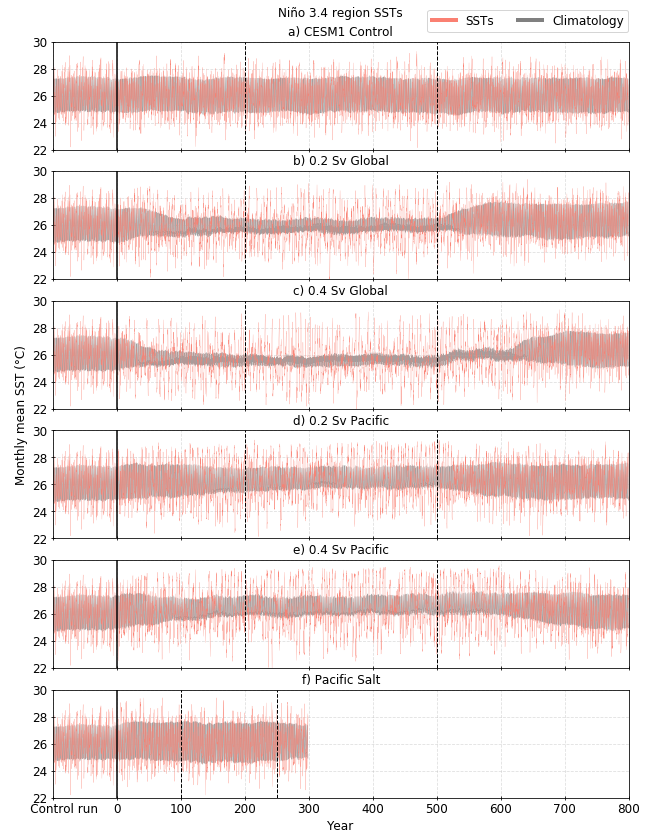

In [12]:
# --------------

fig = plt.figure(figsize=(8,12))

fig.suptitle(u'Niño 3.4 region SSTs', x=0.5, y=0.915, fontsize=12)

# --------------

ax1 = plt.axes([0., 0.75, 1., 0.125])

ax1.set_title('a) CESM1 Control', fontsize=12)

ax1.plot(control_ssts_vals, c='salmon', alpha=0.95, lw=0.2, zorder=2)
ax1.plot(control_ssts_roll_vals, c='grey', alpha=0.75, lw=0.25, zorder=1)
ax1.margins(x=0)
ax1.set_xlim([0,10800])
ax1.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=False)
ax1.grid(alpha=0.4, ls='--')

ax1.set_ylim([22,30])
ax1.set_yticks([22,24,26,28,30])
ax1.set_yticklabels([22,24,26,28,30], fontsize=12)

ax1.set_xticks([0,1200,2400,3600,4800,6000,7200,8400,9600,10800])

ax1.axvline(1200, lw=1.5, c='k')
ax1.axvline(3600, lw=1., ls='--', c='k')
ax1.axvline(7200, lw=1., ls='--', c='k')

custom_lines = [Line2D([0], [0], color='salmon', lw=4),
                Line2D([0], [0], color='grey', lw=4)]
ax1.legend(custom_lines, ['SSTs', 'Climatology'], fontsize=12, bbox_to_anchor=(1.01, 1.35), ncol=2)

# --------------

ax2 = plt.axes([0., 0.6, 1., 0.125])

ax2.set_title('b) 0.2 Sv Global', fontsize=12)

ax2.plot(g02sv_ssts_vals, c='salmon', alpha=0.95, lw=0.2, zorder=2)
ax2.plot(g02sv_ssts_roll_vals, c='grey', alpha=0.75, lw=0.25, zorder=1)
ax2.margins(x=0)
ax2.set_xlim([0,10800])
ax2.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=False)
ax2.grid(alpha=0.4, ls='--')

ax2.set_ylim([22,30])
ax2.set_yticks([22,24,26,28,30])
ax2.set_yticklabels([22,24,26,28,30], fontsize=12)

ax2.set_xticks([0,1200,2400,3600,4800,6000,7200,8400,9600,10800])

ax2.axvline(1200, lw=1.5, c='k')
ax2.axvline(3600, lw=1., ls='--', c='k')
ax2.axvline(7200, lw=1., ls='--', c='k')

# --------------

ax3 = plt.axes([0., 0.45, 1., 0.125])

ax3.set_title('c) 0.4 Sv Global', fontsize=12)

ax3.plot(g04sv_ssts_vals, c='salmon', alpha=0.95, lw=0.2, zorder=2)
ax3.plot(g04sv_ssts_roll_vals, c='grey', alpha=0.75, lw=0.25, zorder=1)
ax3.margins(x=0)
ax3.set_xlim([0,10800])
ax3.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=False)
ax3.grid(alpha=0.4, ls='--')

ax3.set_ylim([22,30])
ax3.set_yticks([22,24,26,28,30])
ax3.set_yticklabels([22,24,26,28,30], fontsize=12)

ax3.set_xticks([0,1200,2400,3600,4800,6000,7200,8400,9600,10800])

ax3.axvline(1200, lw=1.5, c='k')
ax3.axvline(3600, lw=1., ls='--', c='k')
ax3.axvline(7200, lw=1., ls='--', c='k')

# --------------

ax4 = plt.axes([0., 0.3, 1., 0.125])

ax4.set_title('d) 0.2 Sv Pacific', fontsize=12)

ax4.plot(p02sv_ssts_vals, c='salmon', alpha=0.95, lw=0.2, zorder=2)
ax4.plot(p02sv_ssts_roll_vals, c='grey', alpha=0.75, lw=0.25, zorder=1)
ax4.margins(x=0)
ax4.set_xlim([0,10800])
ax4.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=False)
ax4.grid(alpha=0.4, ls='--')

ax4.set_ylim([22,30])
ax4.set_yticks([22,24,26,28,30])
ax4.set_yticklabels([22,24,26,28,30], fontsize=12)
a = u"\u00b0"
ax4.set_ylabel('Monthly mean SST ('+a+'C)', fontsize=12, ha='left')

ax4.set_xticks([0,1200,2400,3600,4800,6000,7200,8400,9600,10800])

ax4.axvline(1200, lw=1.5, c='k')
ax4.axvline(3600, lw=1., ls='--', c='k')
ax4.axvline(7200, lw=1., ls='--', c='k')

# --------------

ax5 = plt.axes([0., 0.15, 1., 0.125])

ax5.set_title('e) 0.4 Sv Pacific', fontsize=12)

ax5.plot(p04sv_ssts_vals, c='salmon', alpha=0.95, lw=0.2, zorder=2)
ax5.plot(p04sv_ssts_roll_vals, c='grey', alpha=0.75, lw=0.25, zorder=1)
ax5.margins(x=0)
ax5.set_xlim([0,10800])
ax5.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=False)
ax5.grid(alpha=0.4, ls='--')

ax5.set_ylim([22,30])
ax5.set_yticks([22,24,26,28,30])
ax5.set_yticklabels([22,24,26,28,30], fontsize=12)

ax5.set_xticks([0,1200,2400,3600,4800,6000,7200,8400,9600,10800])

ax5.axvline(1200, lw=1.5, c='k')
ax5.axvline(3600, lw=1., ls='--', c='k')
ax5.axvline(7200, lw=1., ls='--', c='k')

# --------------

ax6 = plt.axes([0., 0., 1., 0.125])

ax6.set_title('f) Pacific Salt', fontsize=12)

ax6.plot(psalt_ssts_vals, c='salmon', alpha=0.95, lw=0.2, zorder=2)
ax6.plot(psalt_ssts_roll_vals, c='grey', alpha=0.75, lw=0.25, zorder=1)
ax6.margins(x=0)
ax6.set_xlim([0,10800])

ax6.tick_params(axis='both', labelleft=True, direction='inout', labelbottom=True)
ax6.grid(alpha=0.4, ls='--')

ax6.set_ylim([22,30])
ax6.set_yticks([22,24,26,28,30])
ax6.set_yticklabels([22,24,26,28,30], fontsize=12)

ax6.set_xlabel('Year', fontsize=12)
ax6.set_xticks([0,1200,2400,3600,4800,6000,7200,8400,9600,10800])
ax6.set_xticklabels(['      Control run',0,100,200,300,400,500,600,700,800], fontsize=12)

ax6.axvline(1200, lw=1.5, c='k')
ax6.axvline(200*12, lw=1., ls='--', c='k')
ax6.axvline(350*12, lw=1., ls='--', c='k')

# --------------

plt.savefig(f'{directory_figs}amocenso_fig8.png', bbox_inches='tight', dpi=200)
plt.show()

# --------------